In [1]:
using Plots
using FFTW
FFTW.set_provider!("mkl")


In [60]:
"""
The following function evaluates the electric field on a uniform grid from the electric potential.

    // Calculate electric field from potential
"""
function Electric!(ϕ, E)
      dx = L / J
      for j in 2:J-1
        E[j] = (ϕ[j-1] - ϕ[j+1]) / 2. / dx
      end
      E[1] = (ϕ[J] - ϕ[2]) / 2. / dx;
      E[J] = (ϕ[J-1] - ϕ[1]) / 2. / dx;
end

Electric!

In [46]:
""" The following routine solves Poisson's equation in 1-D to find the instantaneous electric potential on a uniform grid.

// Solves 1-d Poisson equation:
//    d^u / dx^2 = v   for  0 <= x <= L
// Periodic boundary conditions:
//    u(x + L) = u(x),  v(x + L) = v(x)
// Arrays u and v assumed to be of length J.
// Now, jth grid point corresponds to
//    x_j = j dx  for j = 0,J-1
// where dx = L / J. L / (J-1) in Julia
// Also,
//    kappa = 2 pi / L
"""
function Poisson1D(u, v, kappa)
  #V = fill(0.0+im*0.,J) 
  #U = fill(0.0+im*0.,J÷2+1) 

  # Fourier transform source term
  V = rfft(v)

  # Calculate Fourier transform of u

  V[1] =  0.
  for j in  2:(J÷2+1)
    V[j] = - V[j] / (j-1)^2 / kappa^2
  end

  # Inverse Fourier transform to obtain u
  u = irfft(V,J)
end

Poisson1D

In [49]:
J = 128
L = 3.
dx = L/J
κ = 2π/L
x = [dx*(i-1) for i in 1:J]
ω = 5
v = sin.(κ*ω*x)
u = zeros(J)
ϕ = Poisson1D(u,v,κ);

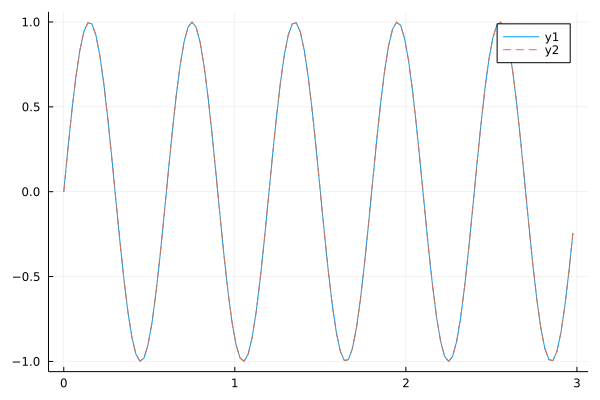

In [51]:
plot(x,-(ω*κ)^2.0.*ϕ)
plot!(x,v,ls=:dash)

In [52]:
J = 128
#J = 1028
L = 3.
dx = L/J
κ = 2π/L
x = [dx*(i-1) for i in 1:J]
ω = 5
v = sin.(κ*ω*x) + cos.(κ*ω*4*x)
V = rfft(v);


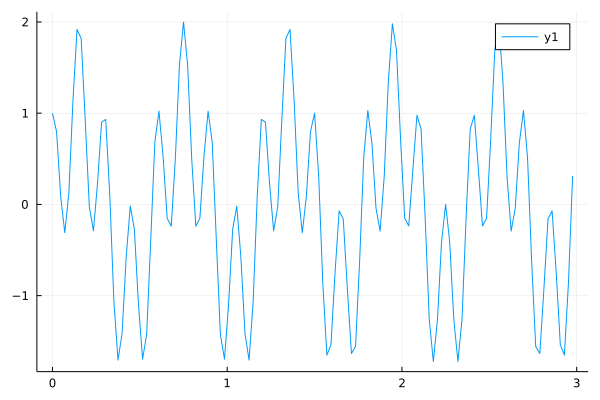

In [53]:
plot(x,v)

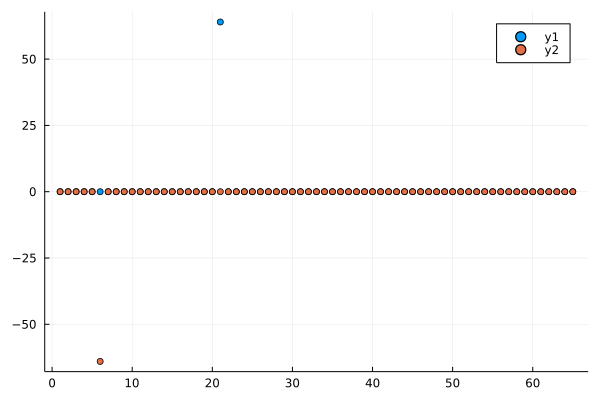

In [54]:
scatter(real.(V))
scatter!(imag.(V))
#plot!(x, imag.(V))
#plot(x,v)


In [55]:
vv = irfft(V,J)

128-element Vector{Float64}:
  0.9999999999999998
  0.7985504129228664
  0.08871330446090814
 -0.3092263255562121
  0.12436283111599744
  1.136634387199148
  1.9190642591834832
  1.8206461222673267
  0.9238795325112885
 -0.028262080821899183
  ⋮
 -1.6346771437832002
 -0.9238795325113056
 -0.1577068976622446
 -0.07130519416090625
 -0.7464537431668714
 -1.5385763934890817
 -1.6523442352502549
 -0.8540801691911016
  0.31259005311631416

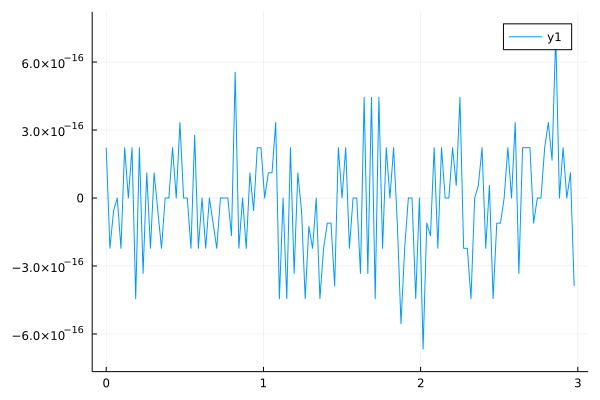

In [56]:
plot(x, v-vv)

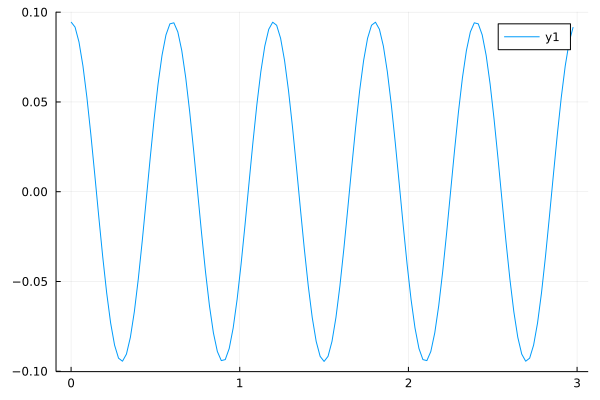

In [61]:
E = zeros(J)
Electric!(ϕ, E)
plot(x,E)